In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ['userid','time','extype','examount','mark']
bank_detail_train = pd.read_csv("../../pcredit/train/bank_detail_train.txt",header=None)

In [3]:
bank_detail_train.columns = names
bank_detail_train.head()

,userid,time,extype,examount,mark
0,6965,5894316387,0,13.756664,0
1,6965,5894321388,1,13.756664,0
2,6965,5897553564,0,14.449810,0
3,6965,5897563463,1,10.527763,0
4,6965,5897564598,1,13.651303,0


In [21]:
names = ['userid','time','extype','examount','mark']
bank_detail_test = pd.read_csv("../../pcredit/test/bank_detail_test.txt",header=None)
bank_detail_test.columns = names
bank_detail_test.head()

,userid,time,extype,examount,mark
0,57189,5898958287,1,10.760951,0
1,57189,5898958287,0,11.402795,0
2,57189,5898958287,1,6.849967,0
3,57189,5898958287,0,6.849967,0
4,57189,5899995087,1,16.752395,0


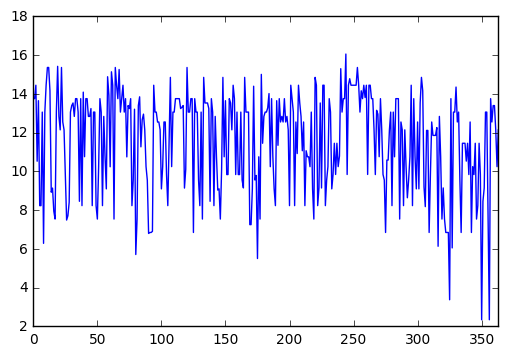

In [4]:
# 1) 用户收支情况分析
examount6965 = bank_detail_train[bank_detail_train['userid']==6965]['examount']
examount6965.plot()
plt.show()

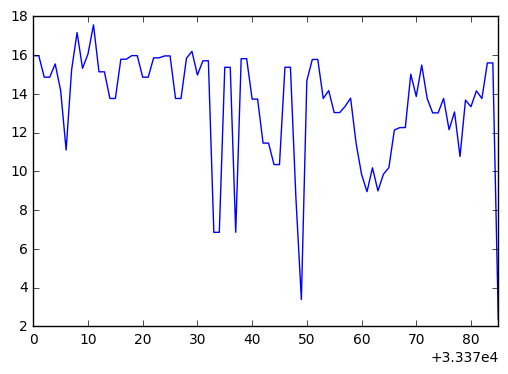

In [6]:
examount1 = bank_detail_train[bank_detail_train['userid']==1]['examount']
examount1.plot()
plt.show()

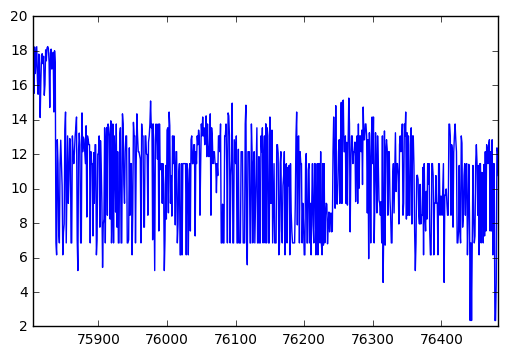

In [7]:
examount3 = bank_detail_train[bank_detail_train['userid']==3]['examount']
examount3.plot()
plt.show()

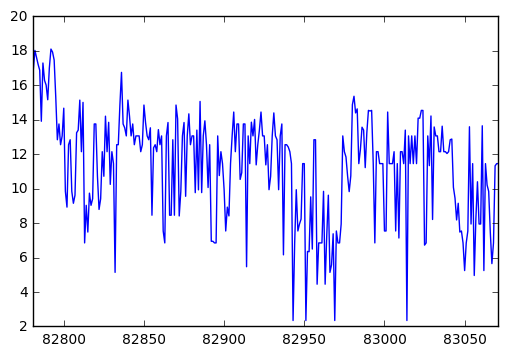

In [8]:
examount4 = bank_detail_train[bank_detail_train['userid']==4]['examount']
examount4.plot()
plt.show()

In [9]:
#  缺失用户数分析
##  1)统计收入 examount 的均值  2) 统计支出 examount  的均值
amount_data = pd.pivot_table(bank_detail_train,index=['userid'],values=['examount'])
amount_data.head()

,examount
userid,
1,13.450210
3,10.699309
4,11.318791
9,13.682413
10,12.481280


In [22]:
#  缺失用户数分析
##  1)统计收入 examount 的均值  2) 统计支出 examount  的均值
amount_test_data = pd.pivot_table(bank_detail_test,index=['userid'],values=['examount'])
amount_test_data.head()

,examount
userid,
55597,11.886130
55599,12.739281
55602,12.126517
55612,12.416051
55621,12.198238


In [10]:
amount_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9294 entries, 1 to 55587
Data columns (total 1 columns):
examount    9294 non-null float64
dtypes: float64(1)
memory usage: 145.2 KB


In [13]:
# 用户id,性别,职业,教育程度,婚姻状态,户口类型
names = ['userid','sex','job','edu','marriage','account']
user_info_train = pd.read_csv("../../pcredit/train/user_info_train.txt",header=None)
user_info_train.columns = names
user_info = pd.pivot_table(user_info_train,index=["userid"],values=names)
user_info.head()  #  bill_detail  数据中 userid == 1 的数据没有

,account,edu,job,marriage,sex
userid,,,,,
1,3,3,2,1,1
2,1,3,2,2,1
3,4,4,4,1,1
4,2,4,4,3,1
5,1,2,2,3,1


In [23]:
# 用户id,性别,职业,教育程度,婚姻状态,户口类型
names = ['userid','sex','job','edu','marriage','account']
user_info_test = pd.read_csv("../../pcredit/test/user_info_test.txt",header=None)
user_info_test.columns = names
user_test_info = pd.pivot_table(user_info_test,index=["userid"],values=names)
user_test_info.head()  #  bill_detail  数据中 userid == 1 的数据没有

,account,edu,job,marriage,sex
userid,,,,,
55597,4,3,2,1,2
55598,4,2,2,3,1
55599,1,4,2,2,2
55600,1,4,4,3,2
55601,4,3,2,1,1


In [17]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55596 entries, 1 to 55596
Data columns (total 5 columns):
account     55596 non-null int64
edu         55596 non-null int64
job         55596 non-null int64
marriage    55596 non-null int64
sex         55596 non-null int64
dtypes: int64(5)
memory usage: 2.5 MB


In [15]:
user_bank = user_info.join(amount_data)
user_bank.head()

,account,edu,job,marriage,sex,examount
userid,,,,,,
1,3,3,2,1,1,13.450210
2,1,3,2,2,1,NaN
3,4,4,4,1,1,10.699309
4,2,4,4,3,1,11.318791
5,1,2,2,3,1,NaN


In [20]:
user_bank[user_bank['examount'].isnull()].shape

(46302, 6)

In [24]:
user_bank_test = user_test_info.join(amount_test_data)
user_bank_test.head()

,account,edu,job,marriage,sex,examount
userid,,,,,,
55597,4,3,2,1,2,11.886130
55598,4,2,2,3,1,NaN
55599,1,4,2,2,2,12.739281
55600,1,4,4,3,2,NaN
55601,4,3,2,1,1,NaN


In [27]:
amount_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 55597 to 69094
Data columns (total 1 columns):
examount    709 non-null float64
dtypes: float64(1)
memory usage: 11.1 KB


In [25]:
user_test_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13899 entries, 55597 to 69495
Data columns (total 5 columns):
account     13899 non-null int64
edu         13899 non-null int64
job         13899 non-null int64
marriage    13899 non-null int64
sex         13899 non-null int64
dtypes: int64(5)
memory usage: 651.5 KB


In [26]:
user_bank_test[user_bank_test['examount'].isnull()].shape

(13190, 6)